# **D**istribution of **U**ncertainty **Q**uality
The idea is that for any prediction $f(x)$ made by a model, we expect the prediction to be drawn from a normal distribution with mean $\mu=\hat{f}$ and variance equal to the uncertainty prediction of the model $\sigma(x)^2$. Here $\hat{f}$ is the 'true' value. Which means:

$f(x) \sim \mathcal{N}(\hat{f},\sigma(x))$

$f(x) - \hat{f} \sim \mathcal{N}(0,\sigma(x))$

$\frac{f(x) - \hat{f}}{\sigma(x)} \sim \mathcal{N}(0,1) \qquad(1)$

Therefore, when we work out the residual divided by the uncertainty $(1)$ for each entry in our test data, $x_i$, we expect the resulting distribution to be normal with mean 0 and standard deviation 1. The DUQ is a way to compare the actual and theoretical distributions, thereby giving a measure of the quality of the model's uncertainty. Smaller values indicate a smaller 'error' between the theoretical and actual distribution, meaning a better prediction of uncertainty. 

See this paper: https://doi.org/10.1016/j.commatsci.2021.110916 for details. 

In [1]:
from duq import DUQ,plot_duq
import numpy as np
from numpy.random import normal

Generate some random example data then calculate DUQ and plot it. 

In [2]:
# Well estimated uncertainties.
y_true = np.zeros(100)
y_unc = np.abs(normal(scale=1.0,size=100))
y_pred = normal(scale=y_unc/np.sqrt(2),size=100)
duq_calc = DUQ()
duq,bins,ideal_hist,hist = duq_calc(y_true,y_pred,y_unc)
print(duq)

0.09625


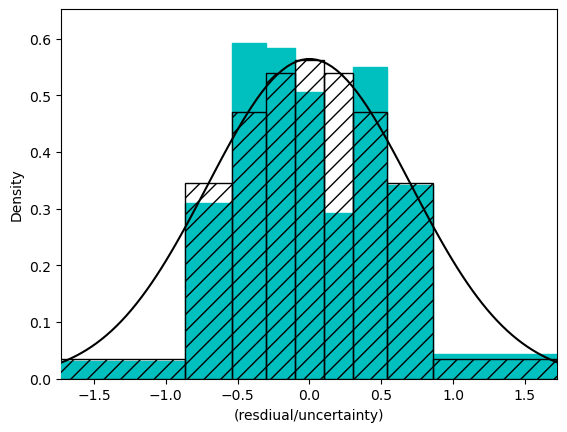

In [3]:
plot_duq(bins,ideal_hist,hist)

In [4]:
# Overestimated uncertainties.
y_true = np.zeros(100)
y_unc = np.abs(normal(scale=1.0,size=100))
y_pred = normal(scale=0.4*y_unc,size=100)
duq_calc = DUQ()
duq,bins,ideal_hist,hist = duq_calc(y_true,y_pred,y_unc)
print(duq)


0.305


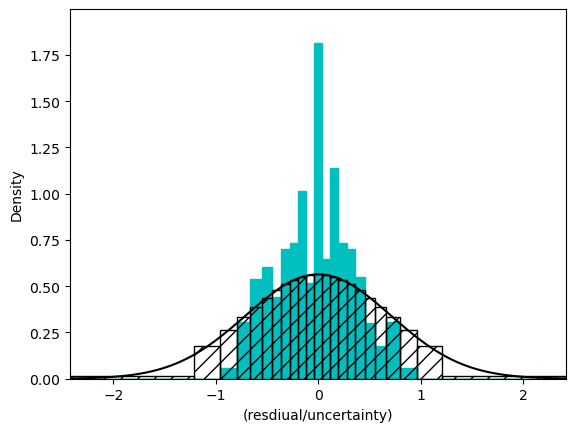

In [5]:
plot_duq(bins,ideal_hist,hist)

In [6]:
# Underestimated uncertainties.
y_true = np.zeros(100)
y_unc = np.abs(normal(scale=1.0,size=100))
y_pred = normal(scale=1.4*y_unc,size=100)
duq_calc = DUQ()
duq,bins,ideal_hist,hist = duq_calc(y_true,y_pred,y_unc)
print(duq)

0.315


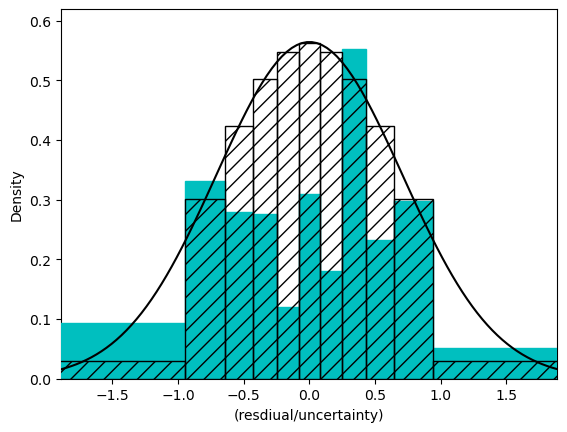

In [7]:
plot_duq(bins,ideal_hist,hist)